# **Regression Project: Boston House Price Prediction**
**Data source:** https://lib.stat.cmu.edu/datasets/boston

We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [37]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [38]:
df = pd.read_csv('Boston.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


## Data Overview

In [39]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [40]:
# Check for missing values
print(df.isnull().sum())

#check for datatype
print(df.dtypes)

# Check the shape of the DataFrame
print(df.shape)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object
(506, 13)


**Observations && Sanity checks：**
- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [41]:
# Describe the numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


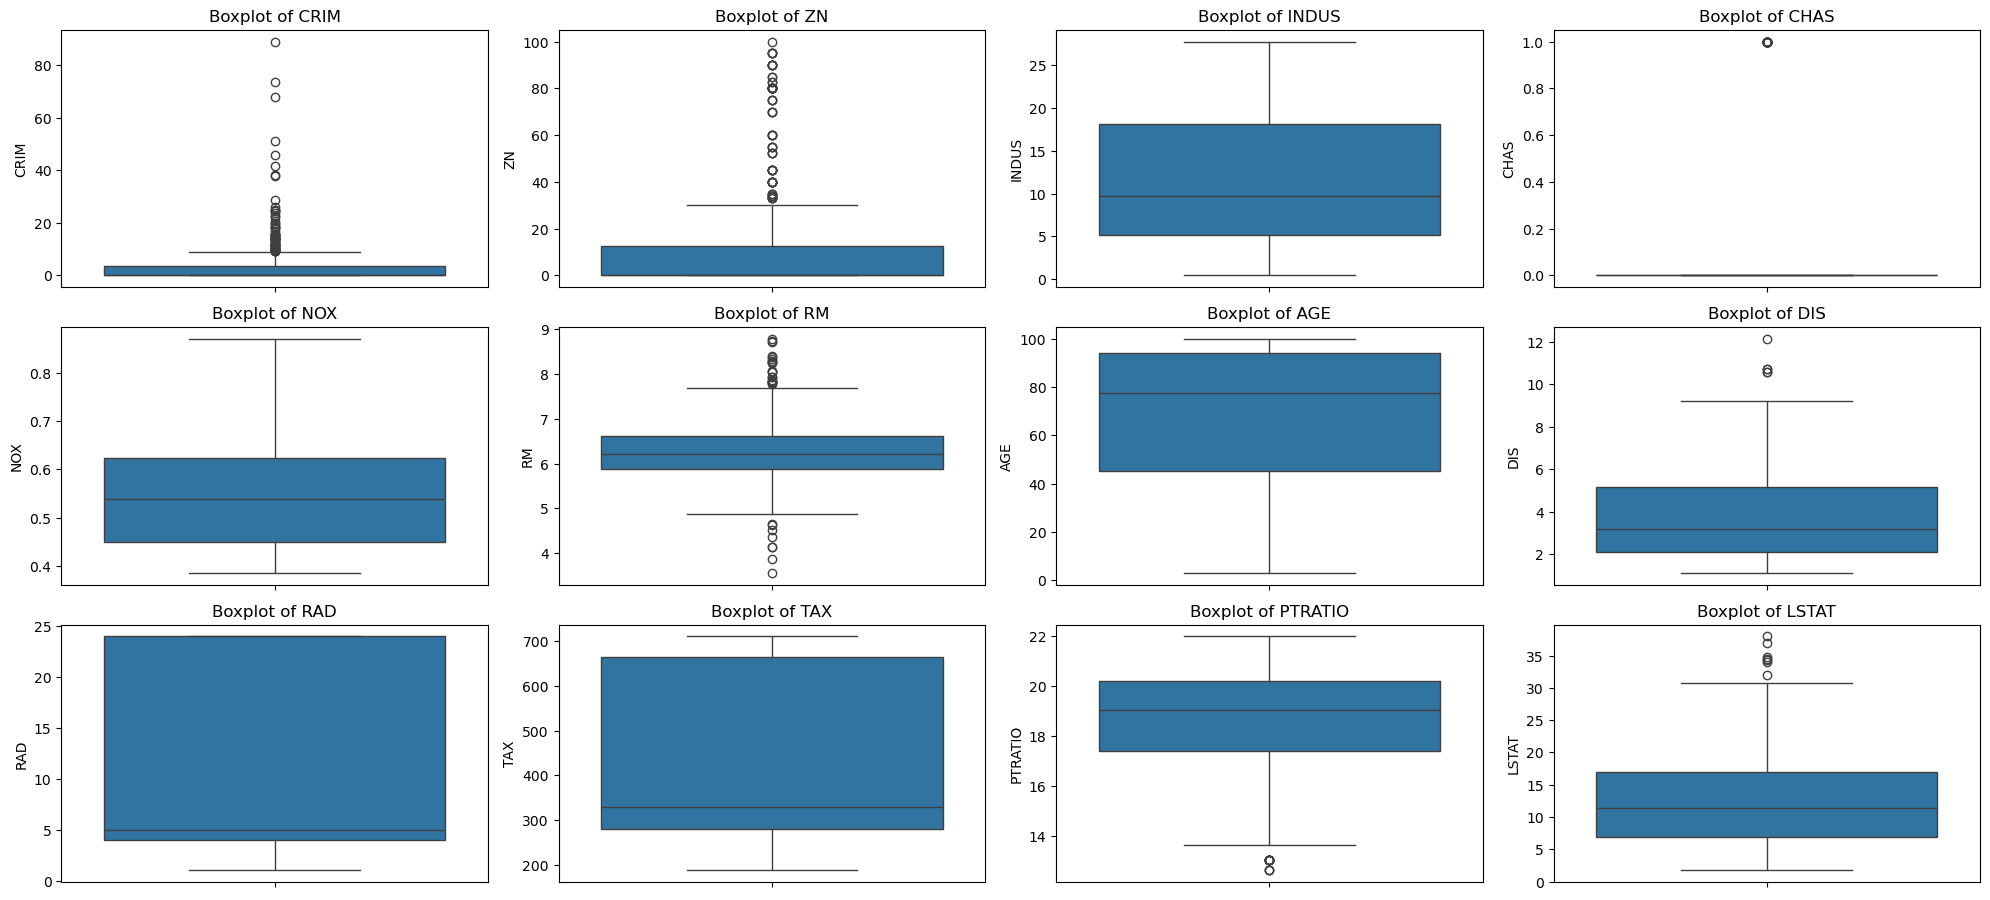

In [42]:
# boxplot of all features

plt.figure(figsize=(20, 12))

for i, col in enumerate(df.columns):
    if col != 'MEDV':  # Exclude the target variable from the plot
        plt.subplot(4, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout() # Adjust layout to prevent overlapping

plt.show()

**Observation:**

- **CRIM:** 75% of the crime rate falls between 0 and 4 with a max of 88.97
- **ZN:** More than 50% of the area has no residential land zoned for lots exceeding 25,000 sq. ft., while the maximum percentage is 100%. This suggests that large residential lots are a **rare commodity** in this region.
- **INDUS:** The percentage of industrial businesses in most towns falls between 0.4% and 27.74%, with an average of 11%.
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise), over 75% are with value 0, and max value is 1.
- **NOX:** The values range from a low of 0.38 to a high of 0.87, with an average of 0.55.
- **RM:** With an average of 6.28, the values vary widely, from 3.56 to 8.78.
- **AGE:** Min AGE us 2.90 with Max value 100. The min age means there is no new-built houses from this dataset.
- **DIS:** The values range from a low of 1.12 to a high of 12.12, with an average of 3.79.
- **RAD:** The values range from 1 to 24, but the over 75% are at the maximum value of 24.
- **TAX:** The values range from a low of 187 to a high of 711, with an average of 408.
- **PTRATIO:** The number of rooms per dwelling unit varies significantly, ranging from 12.6 to 22 rooms.
- **LSTAT:** The percentage of lower socioeconomic status population in each area ranges from 7% to 37.9%, with an average of 12.65%.
- **MEDV:** Values in the area range from 5,000 to 50,000. The average median value is 22,000.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

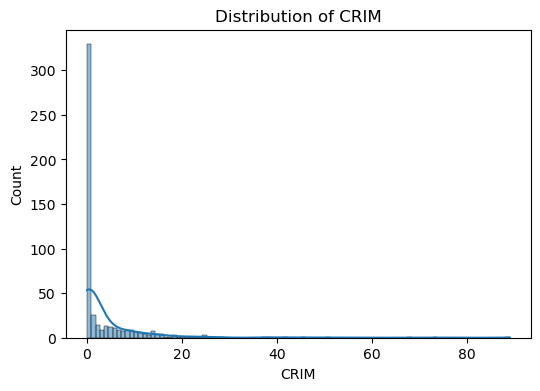

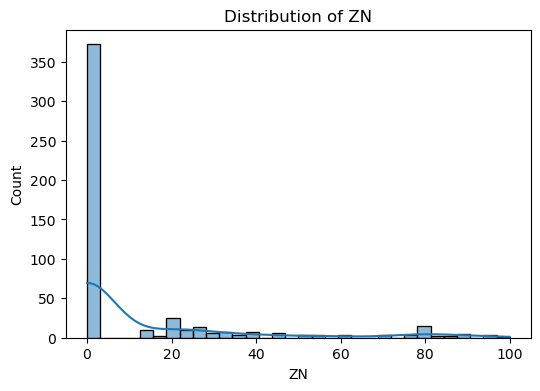

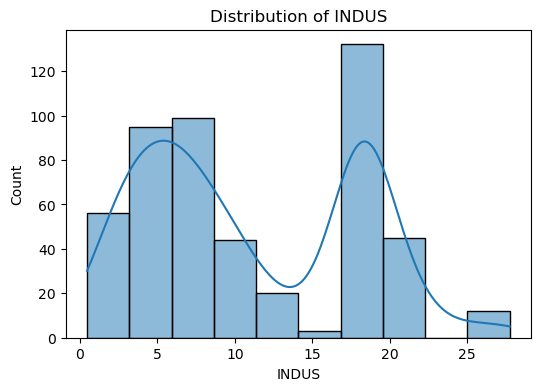

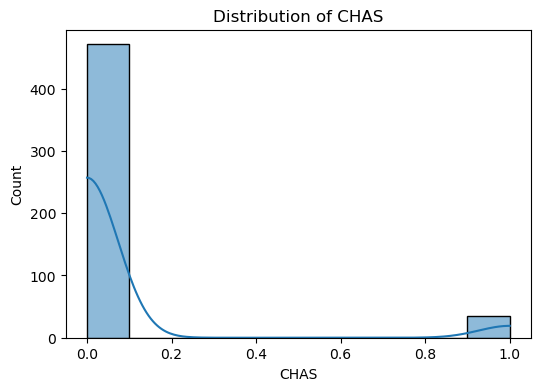

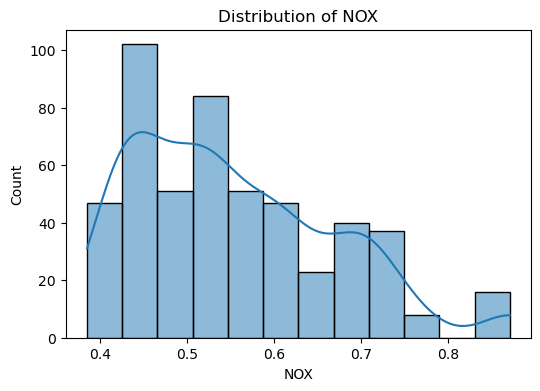

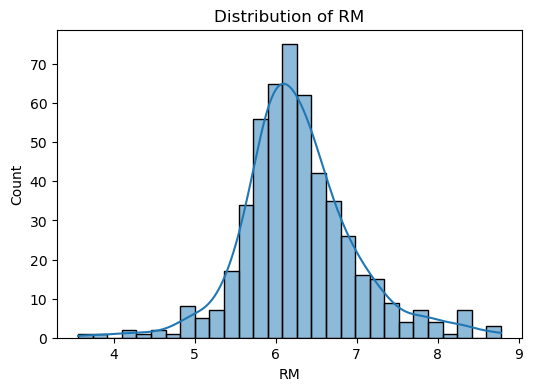

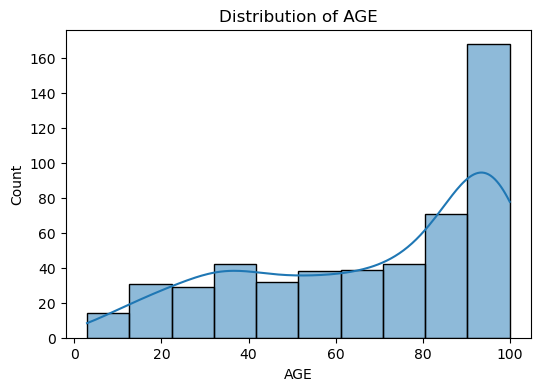

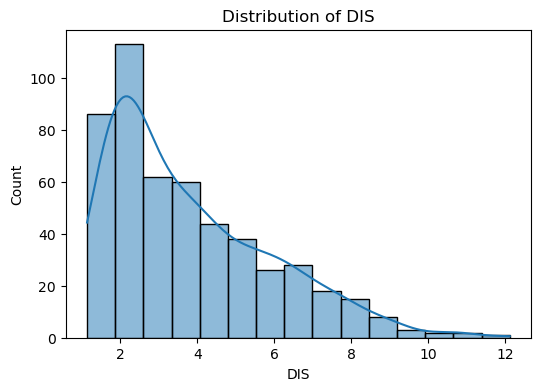

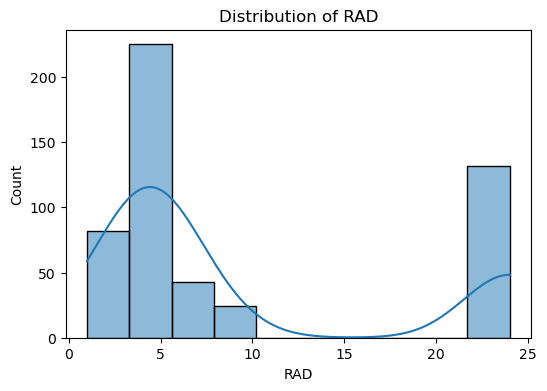

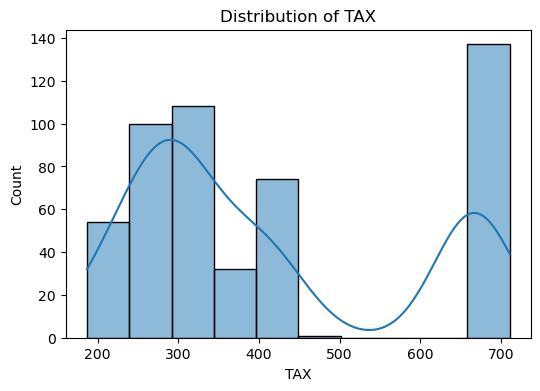

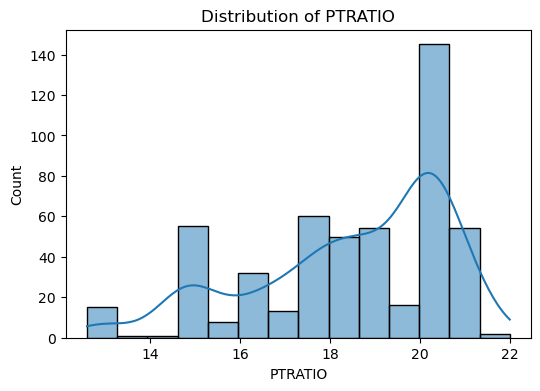

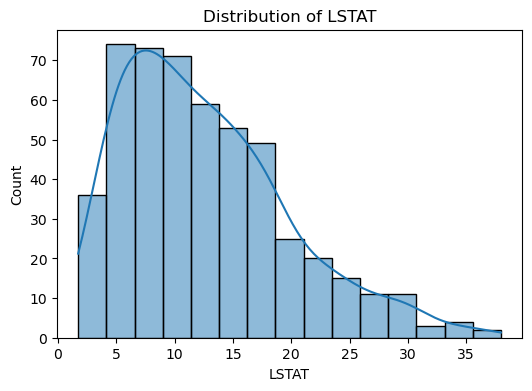

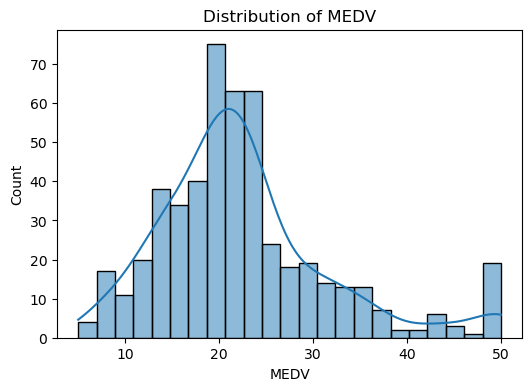

In [43]:
# Plotting all the columns to look at their distributions
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

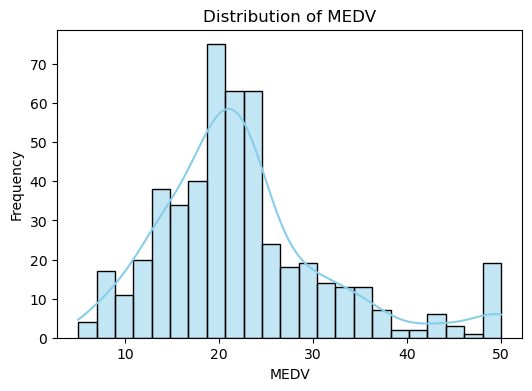

In [44]:
# plot the distribution of "MEDV'

plt.figure(figsize=(6, 4))
sns.histplot(df['MEDV'], color='skyblue',kde = True)
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

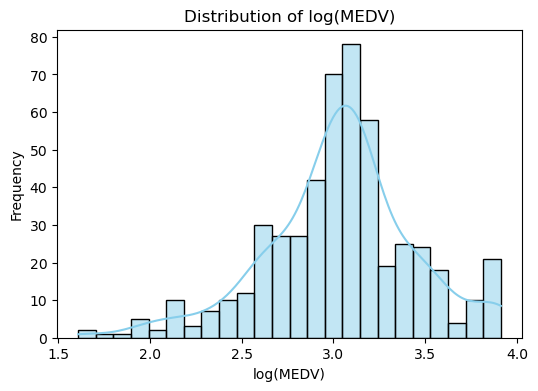

In [45]:
df['MEDV_log'] = np.log(df['MEDV'])

# visualize the distribution of the log-transformed 'MEDV'，use df['MEDV_log'] for further analysis or modeling.
plt.figure(figsize=(6, 4))
sns.histplot(df['MEDV_log'], color='skyblue',kde = True)
plt.title('Distribution of log(MEDV)')
plt.xlabel('log(MEDV)')
plt.ylabel('Frequency')
plt.show()

**Observations:**
- To address the slight skew in the 'MEDV' column, we'll apply a log transformation. The resulting 'MEDV_log' column exhibits **a nearly normal distribution**, allowing us to proceed with our analysis.

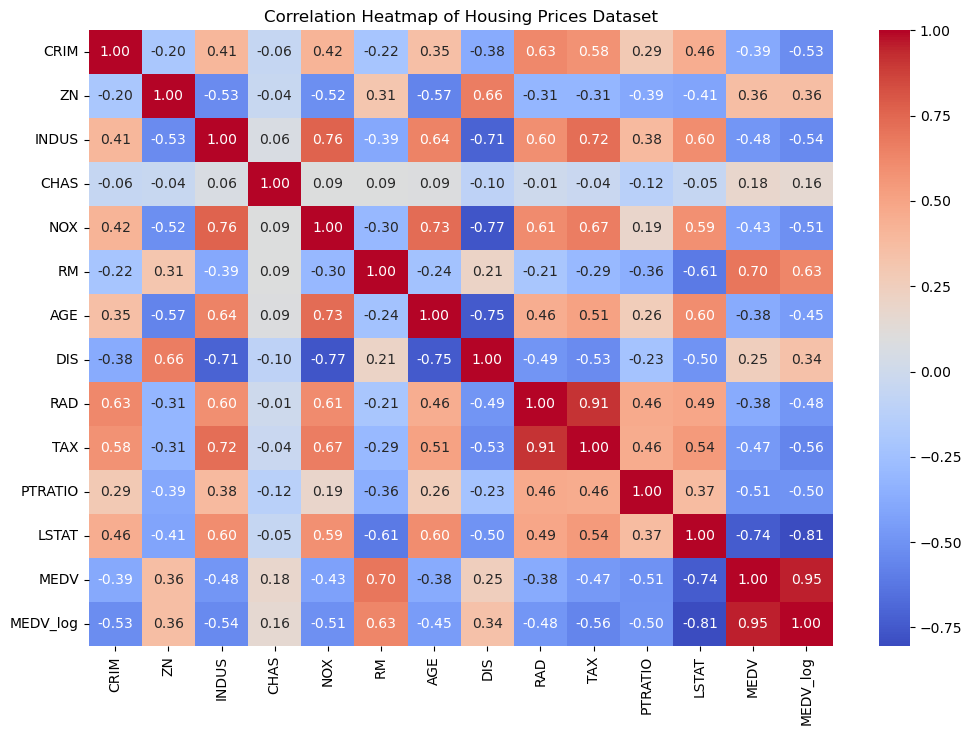

In [46]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Prices Dataset')
plt.show()

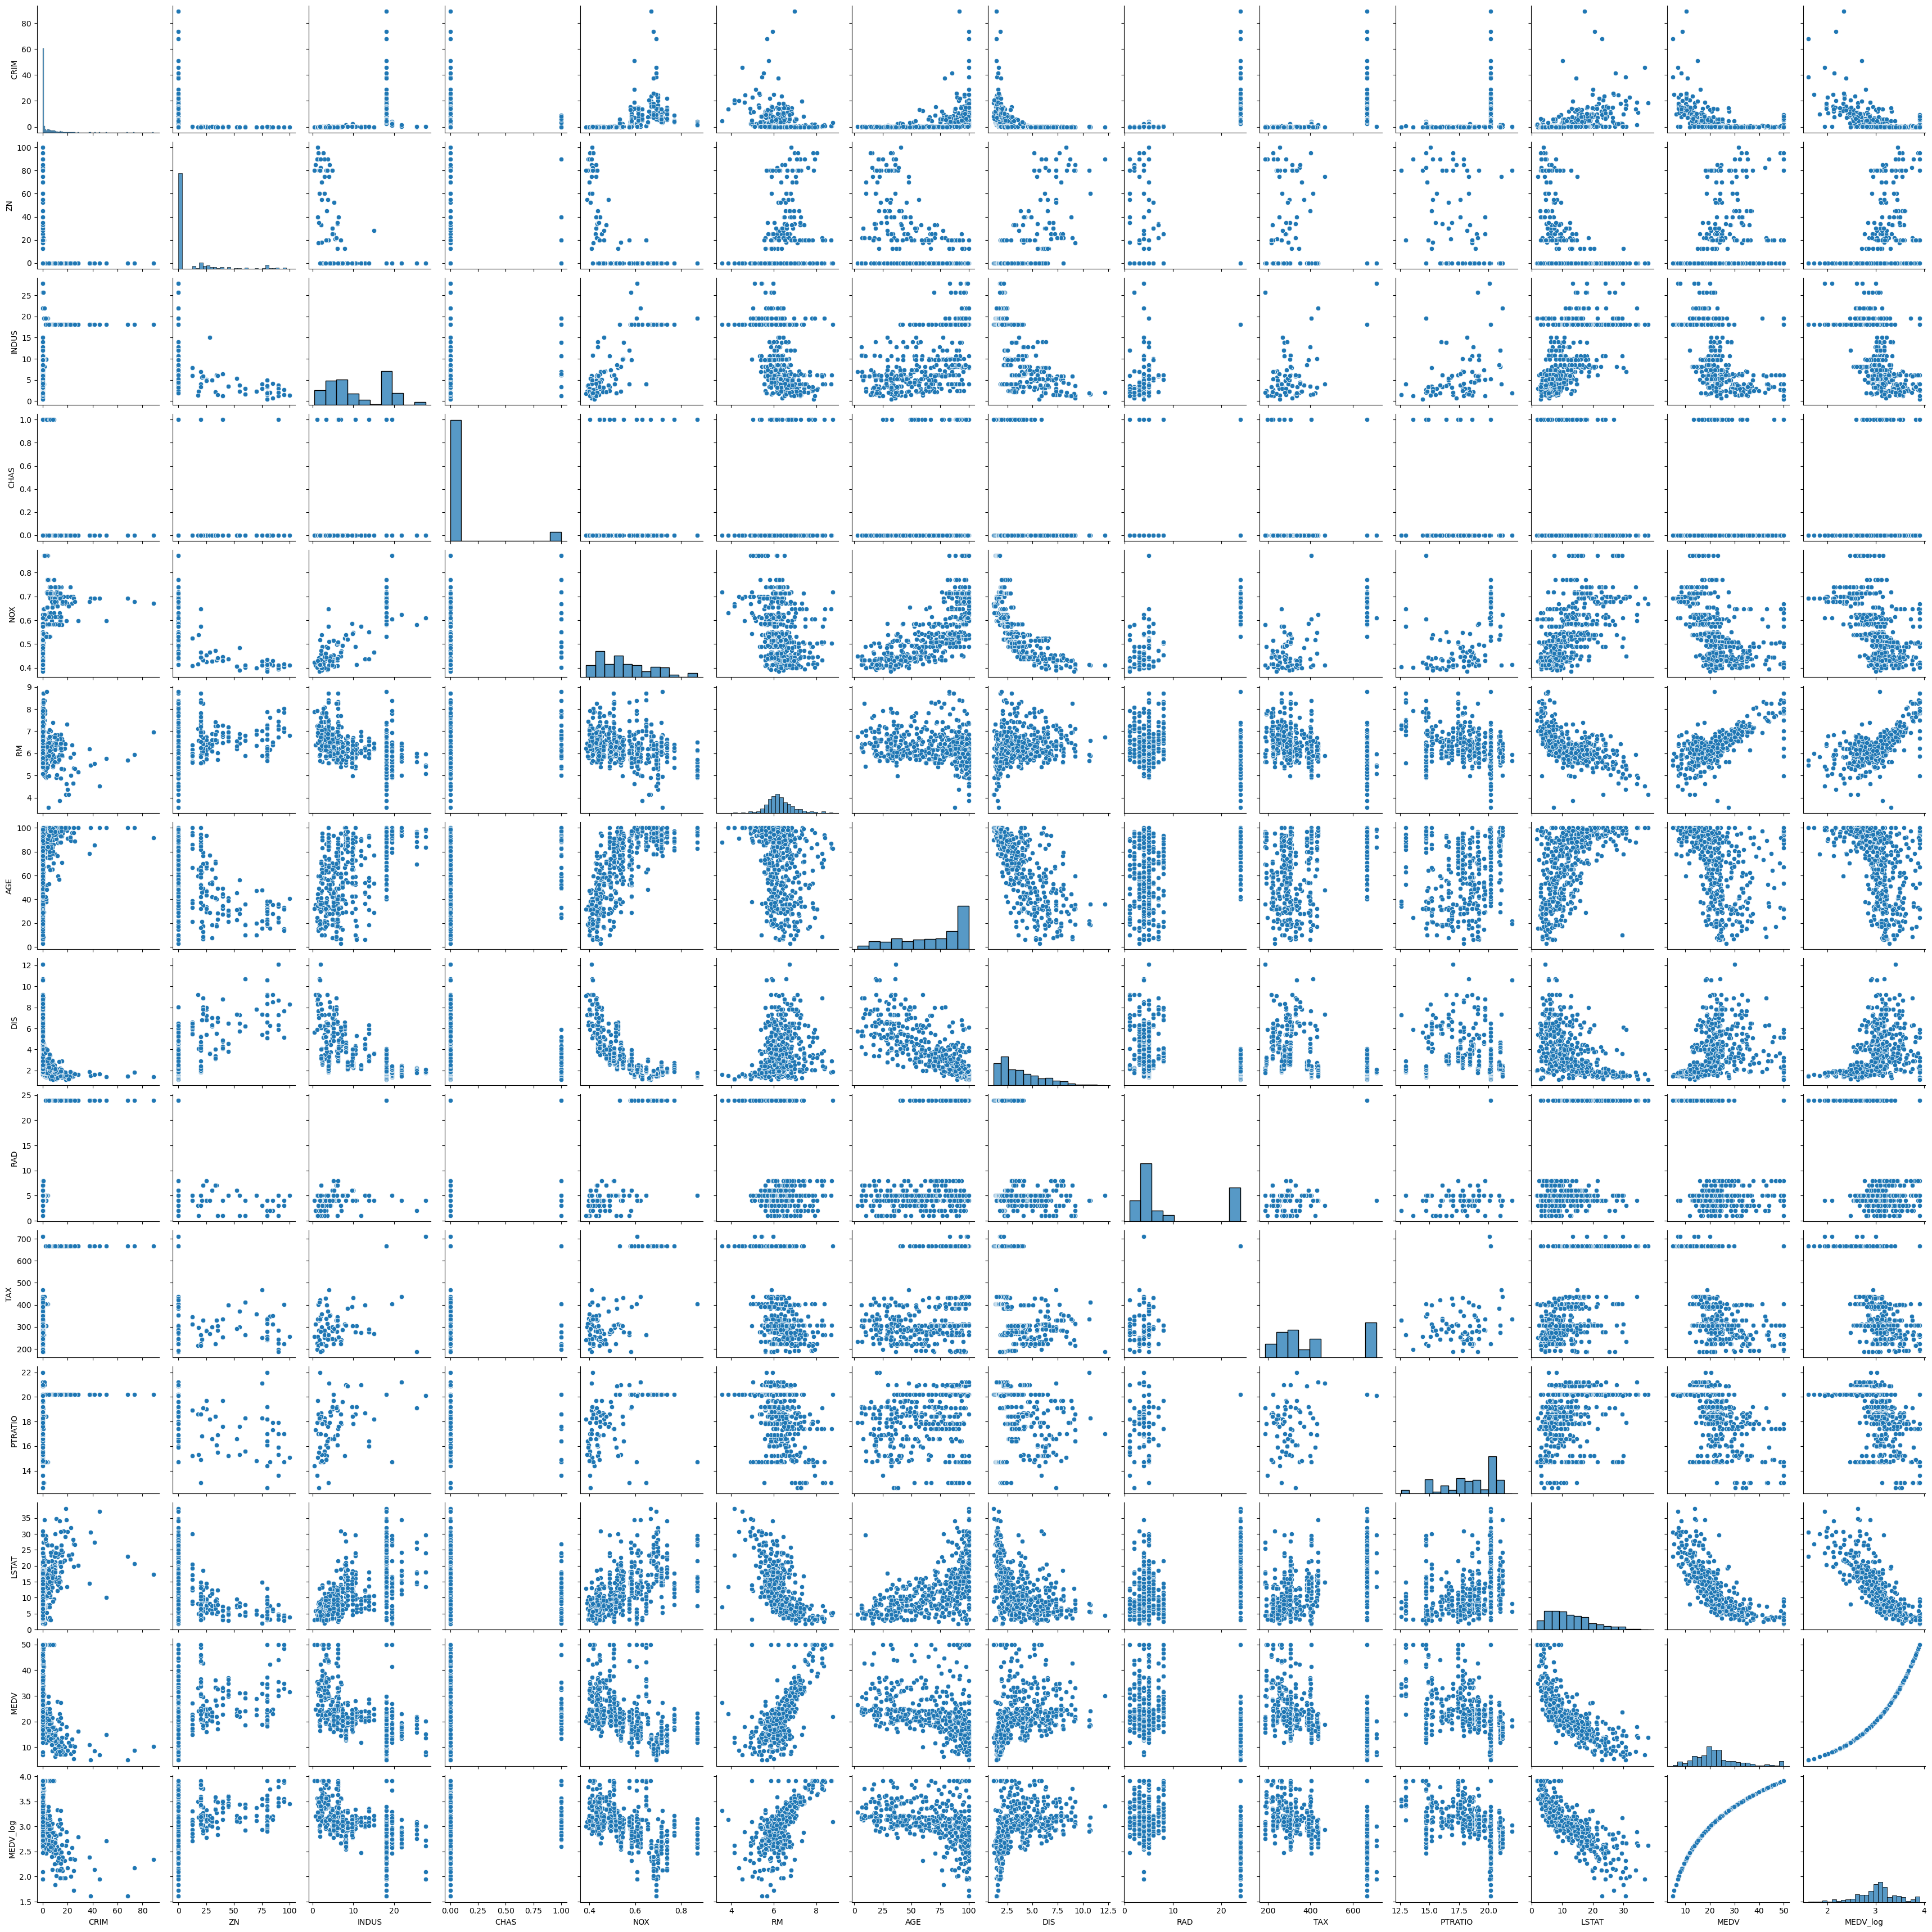

In [47]:
sns.pairplot(df)

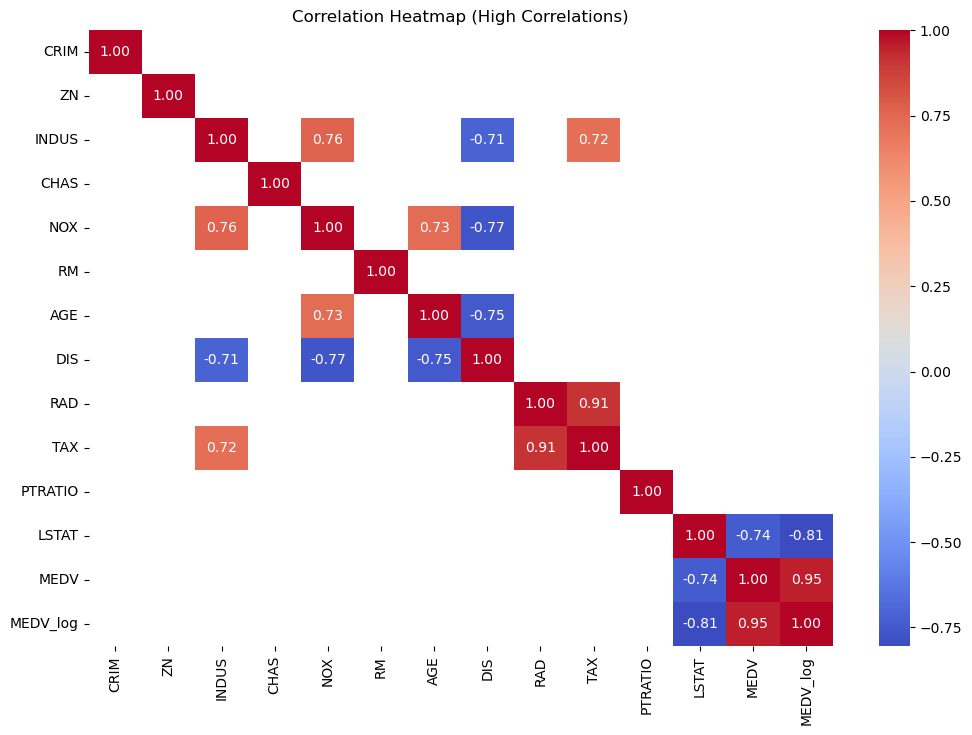

In [48]:
# prompt: highlight the correlation with value >=0.7 and <=-0.7

# Identify correlations greater than or equal to 0.7 or less than or equal to -0.7
high_corr = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]

# Plotting the correlation heatmap for high correlations
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (High Correlations)')
plt.show()

In [49]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation of 'MEDV' with other features
print(corr_matrix['MEDV'].sort_values(ascending=False))

MEDV        1.000000
MEDV_log    0.953155
RM          0.695360
ZN          0.360445
DIS         0.249929
CHAS        0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
TAX        -0.468536
INDUS      -0.483725
PTRATIO    -0.507787
LSTAT      -0.737663
Name: MEDV, dtype: float64


In [50]:
# prompt: Display the correlation of 'MEDV_log' with other features

# Display the correlation of 'MEDV_log' with other features
print(corr_matrix['MEDV_log'].sort_values(ascending=False))

MEDV_log    1.000000
MEDV        0.953155
RM          0.632021
ZN          0.363344
DIS         0.342780
CHAS        0.158412
AGE        -0.453422
RAD        -0.481971
PTRATIO    -0.501729
NOX        -0.510600
CRIM       -0.527946
INDUS      -0.541556
TAX        -0.561466
LSTAT      -0.805034
Name: MEDV_log, dtype: float64


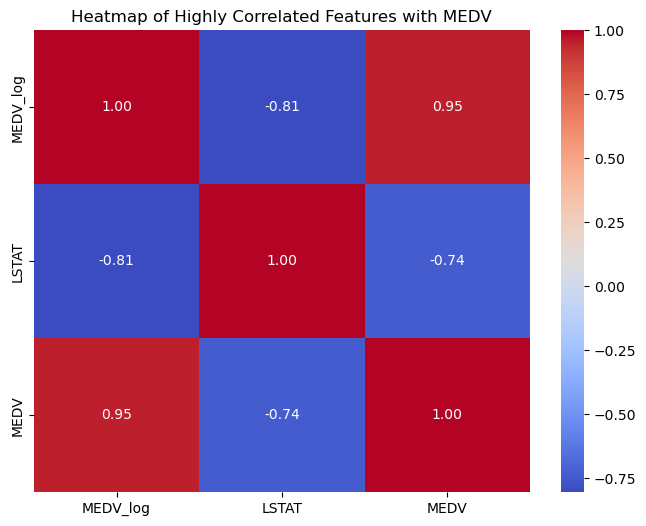

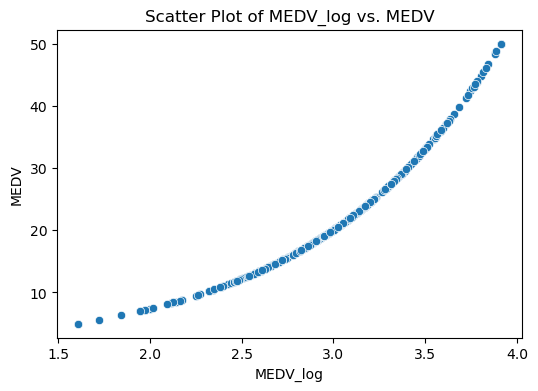

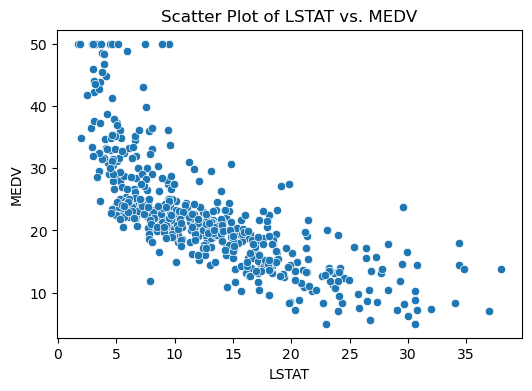

In [51]:
# Identify features with significant correlations (>= 0.7 or <= -0.7) with 'MEDV'
correlations = df.corr()['MEDV'].sort_values(ascending=False)
significant_features = correlations[(correlations >= 0.7) | (correlations <= -0.7)]
significant_features = significant_features.drop('MEDV') #Exclude MEDV itself

# Bivariate analysis using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[significant_features.index.tolist() + ['MEDV']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Highly Correlated Features with MEDV')
plt.show()


# Bivariate analysis using scatter plots
for feature in significant_features.index:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='MEDV', data=df)
    plt.title(f'Scatter Plot of {feature} vs. MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

**Observations:**
- Correlations:
 * The highest possitive correlating feature for `MEDV` is `RM`
 * The highest negative correlating feature for `MEDV` is `LSTAT`

- Other ignificant correlations (>= 0.7 or <= -0.7) exclude `MEDV` and `MEDV_log`:
 * Positive correlations:
   1. `TAX` and `RAD` : 0.91
   2. `NOX` and `AGE` : 0.73
   3. `NOX` and `INDUS`: 0.76
   4. `INDUS` and `TAX`: 0.72
  
 * Negative correlations:
   1. `DIS` and `AGE`: -0.75
   2. `INDUS` and `DIS`: -0.71
   3. `DIS` and `NOX`: -0.77
   
   


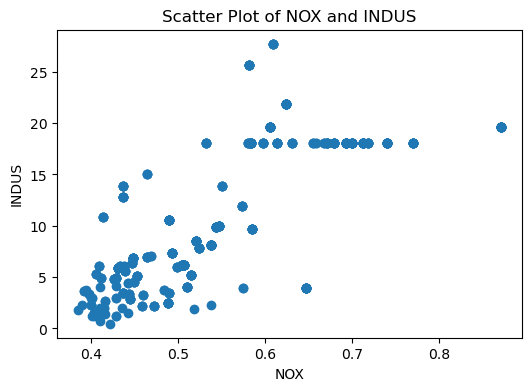

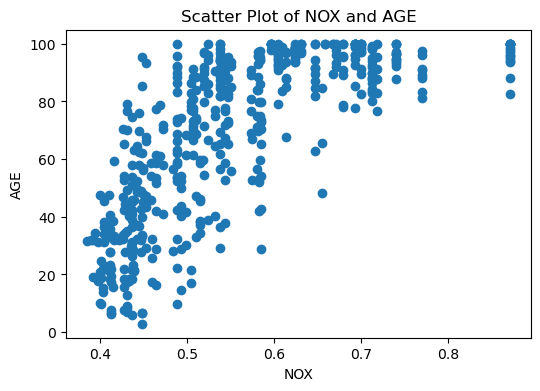

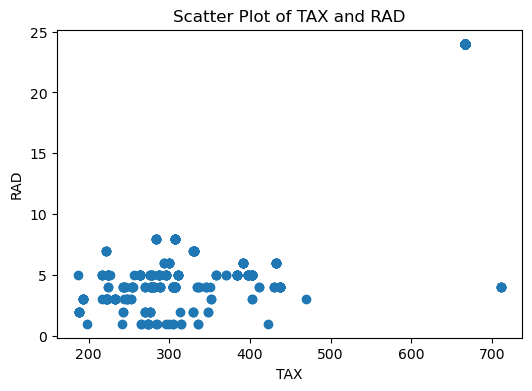

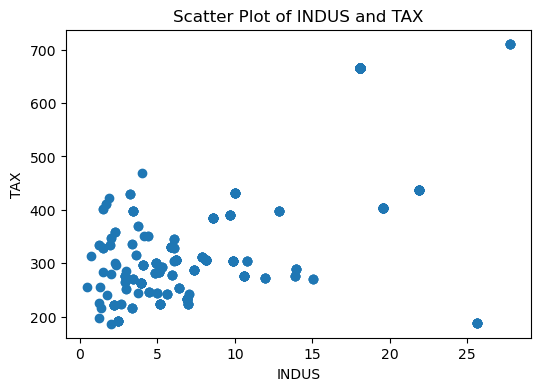

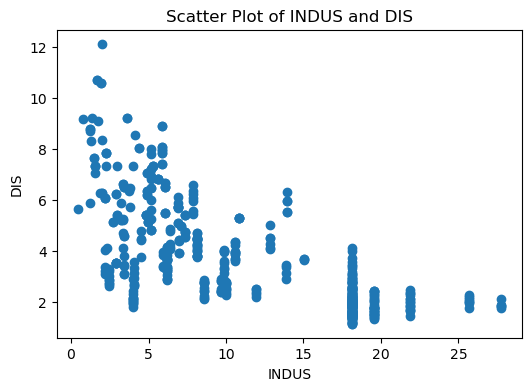

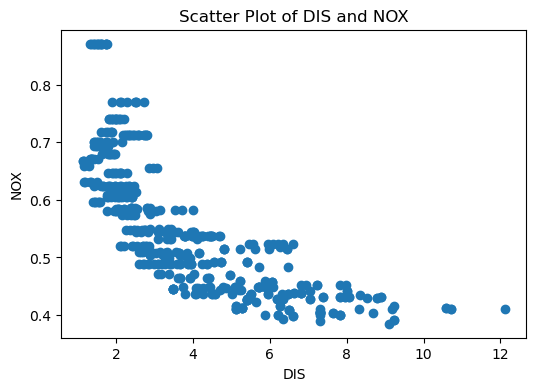

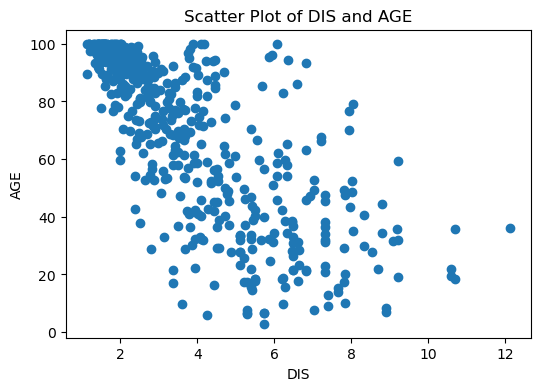

In [52]:
#  generate the scatter plot the positive and negative correlations  :

# Positive correlations
positive_correlations = {
    'NOX and INDUS': (df['NOX'], df['INDUS']),
    'NOX and AGE': (df['NOX'], df['AGE']),
    'TAX and RAD': (df['TAX'], df['RAD']),
    'INDUS and TAX': (df['INDUS'], df['TAX'])
}

for label, (x, y) in positive_correlations.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y)
    plt.title(f'Scatter Plot of {label}')
    plt.xlabel(label.split(' and ')[0])
    plt.ylabel(label.split(' and ')[1])
    plt.show()

# Negative correlations
negative_correlations = {
    'INDUS and DIS': (df['INDUS'], df['DIS']),
    'DIS and NOX': (df['DIS'], df['NOX']),
    'DIS and AGE': (df['DIS'], df['AGE'])
}

for label, (x, y) in negative_correlations.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y)
    plt.title(f'Scatter Plot of {label}')
    plt.xlabel(label.split(' and ')[0])
    plt.ylabel(label.split(' and ')[1])
    plt.show()

**Observation:**
No obvious linear relation shows, need futher analysis.

- The relationship between `AGE` and `DIS`: As the proportion of older homes increases in a town, the distance to Boston employment centers generally decreases. This suggests that these employment centers are often located in established neighborhoods with a higher concentration of older homes.
- The relationship between `RAD` and `TAX`: There is a high degree of correlation between `RAD` and `TAX`. However, when visualizing the data, no discernible trend is evident. This suggests that the strong correlation might be due to the presence of outliers, which can significantly impact statistical measures.


In [53]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.2497573133142919


**Observation:**

- So, the high correlation between `RAD` and `TAX` is due to the outliers. The tax rate for some properties might be higher due to some other reason.

## Model Building - Linear Regression

## **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [54]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [55]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Model Performance Check
1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5).
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [57]:
# prompt: Drop the column 'TAX' from the training data and check if multicollinearity is resolved.

# Drop the 'TAX' column from the training data
X_train = X_train.drop(columns=['TAX'])

# Check for multicollinearity again
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


**Observations:**
- VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

**Model1 - Linear Regression Model**

In [58]:
# Linear Regression Model1: Use the sm.OLS() model on the training data

# Create the OLS model
model1 = sm.OLS(y_train, X_train)

# Fit the model
results = model1.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.40e-101
Time:                        17:49:31   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

**Observations:**
* R-squared assesment is at 76.9%, which can be improved.

While fitting a multiple regression model is essential, it's equally important to evaluate the statistical significance of each regression coefficient. This determines whether the population regression parameters are significantly different from zero.

In our model, the coefficients for ZN, AGE, and INDUS are not statistically significant at the 0.05 significance level. This implies that these variables do not contribute significantly to explaining the variation in the dependent variable. Therefore, we will remove these features and refit the model.

**Model2**
Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame

In [59]:
# Create the model after dropping 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame

# Drop the specified columns from the DataFrame
X_train2 = X_train.drop(columns=['ZN', 'AGE', 'INDUS'])

# Create the OLS model with the updated training data
model2 = sm.OLS(y_train, X_train2)

# Fit the model
results2 = model2.fit()

# Print the model summary
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          2.61e-104
Time:                        17:49:31   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

**Observations:**
* R-squared assesment is at 76.7%, which is lower than model1.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**


**1. Check for mean residuals**

In [60]:
#  Check for mean residuals for each

print(results.resid.mean())
print(results2.resid.mean())

-5.243765246252152e-16
-1.8754614935758295e-16


**Observations:**
- The mean residuals are very close to 0, therefore the assumption is satisfied for each.

**2. Check for homoscedasticity**
- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [61]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [62]:
# Check for homoscedasticity for each model

# Perform Goldfeld-Quandt test for homoscedasticity on model1
name = ["F statistic", "p-value"]
test1 = sms.het_goldfeldquandt(results.resid, results.model.exog)
print("Homoscedasticity test for model1:")
print(dict(zip(name, test1)))

# Perform Goldfeld-Quandt test for homoscedasticity on model2
name = ["F statistic", "p-value"]
test2 = sms.het_goldfeldquandt(results2.resid, results2.model.exog)
print("\nHomoscedasticity test for model2:")
print(dict(zip(name, test2)))

Homoscedasticity test for model1:
{'F statistic': 1.08612488848749, 'p-value': 0.2981482892904684}

Homoscedasticity test for model2:
{'F statistic': 1.0835082923425292, 'p-value': 0.30190120067668275}


**Observations:**
* Since the p-value > 0.05, we fail to reject the Null-Hypothesis hence residuals have heteroscedastic.


**3. Linearity of variables**
A fundamental assumption of linear regression is the linearity of the relationship between the independent and dependent variables. To assess this assumption, we will create a residual plot.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

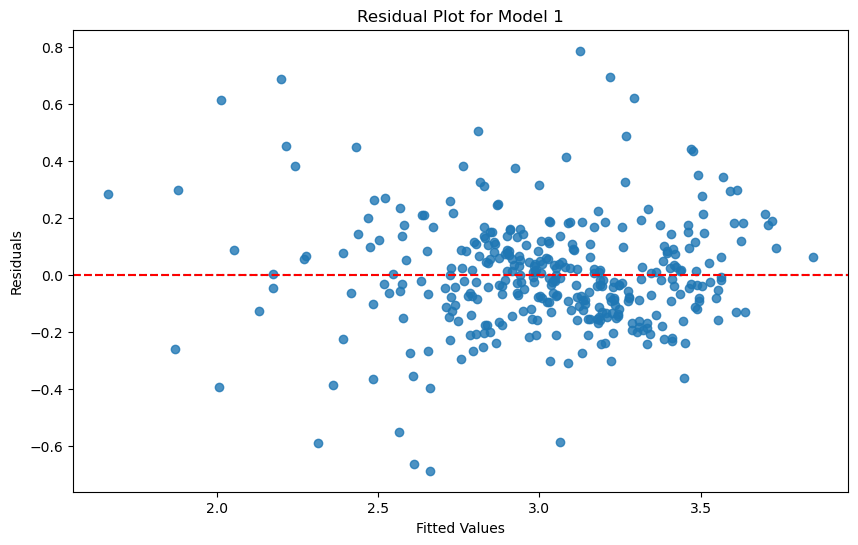

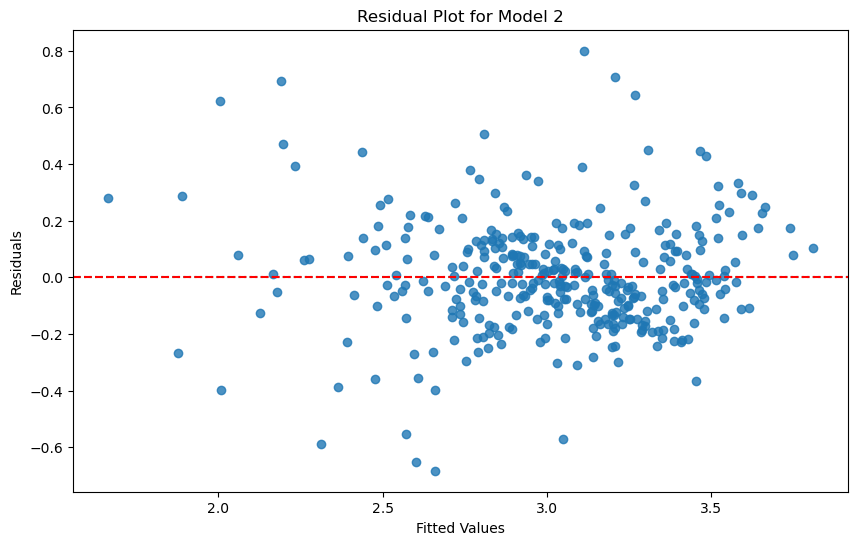

In [63]:
# prompt: plot residuals and the fitted values on a plot

# Residual plot for model1
plt.figure(figsize=(10,6))
sns.residplot(x=results.fittedvalues, y=results.resid)
plt.title('Residual Plot for Model 1')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Residual plot for model2
plt.figure(figsize=(10,6))
sns.residplot(x=results2.fittedvalues, y=results2.resid)
plt.title('Residual Plot for Model 2')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### **4. Normality of error terms**

The residuals should be normally distributed.

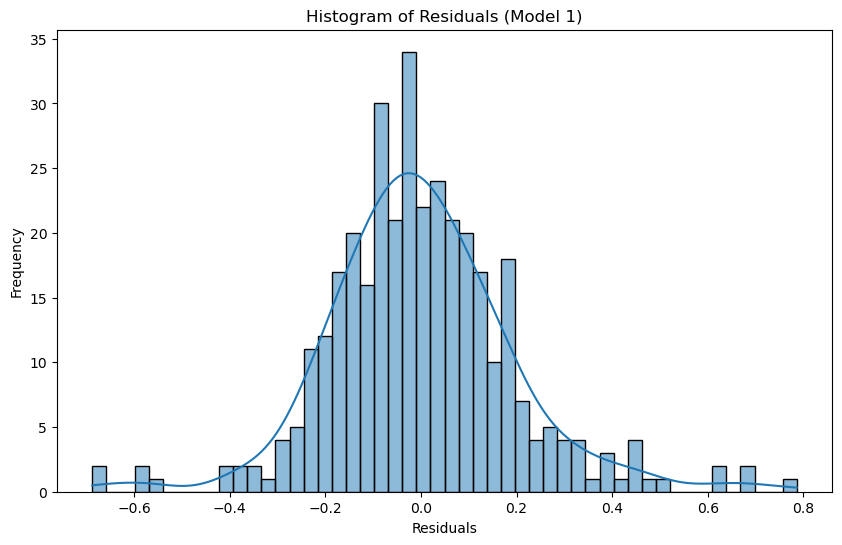

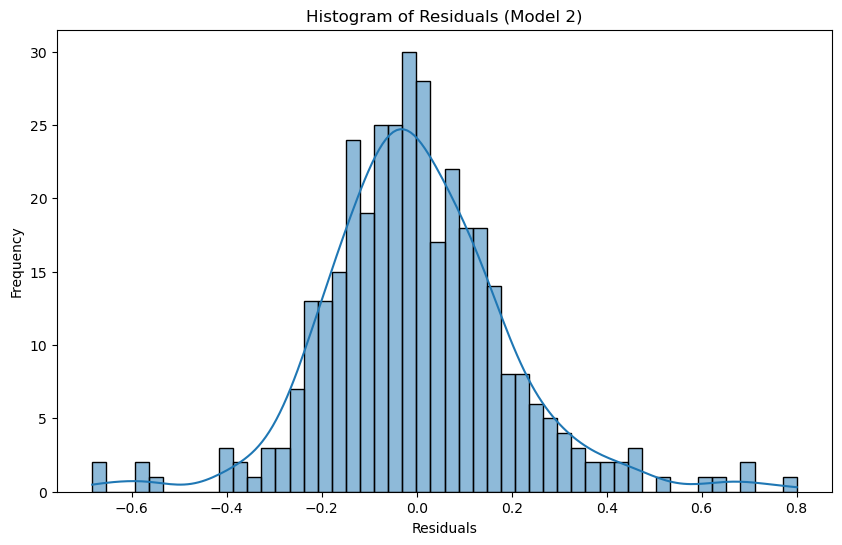

In [64]:
# Plot histogram of residuals

plt.figure(figsize=(10, 6))
sns.histplot(results.resid, bins=50, kde = True)  # Adjust the number of bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Model 1)")
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(results2.resid, bins=50, kde = True)  # Adjust the number of bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Model 2)")
plt.show()

**Observations:**
* The residuals are almost normally distributed.


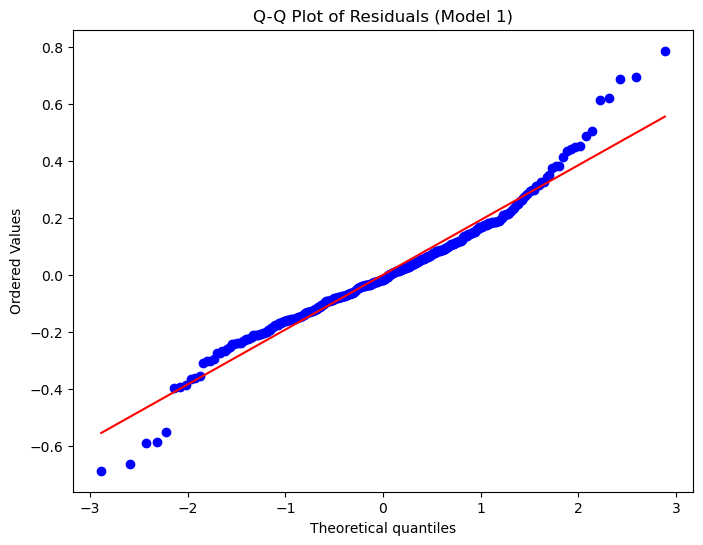

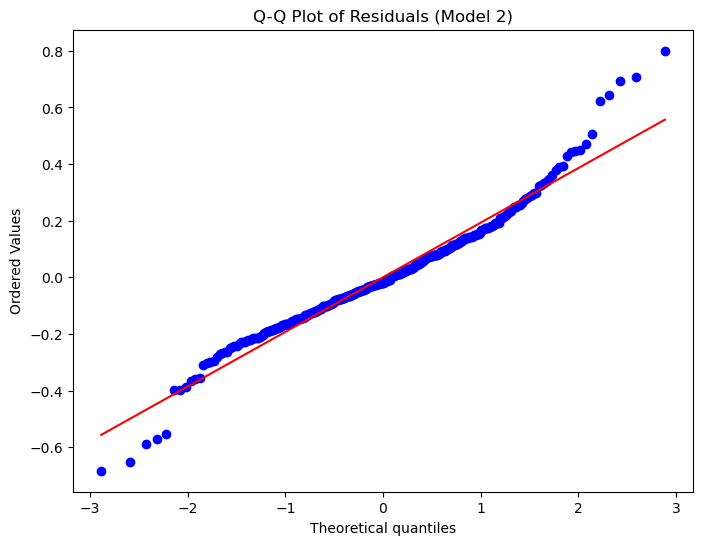

In [65]:
# Plotting Q-Q plots for residuals of both models
import pylab
import scipy.stats as stats

# Model 1 Q-Q plot
plt.figure(figsize=(8, 6))
QQ = stats.probplot(results.resid, dist ="norm", plot =pylab)

plt.title('Q-Q Plot of Residuals (Model 1)')
plt.show()

# Model 2 Q-Q plot
plt.figure(figsize=(8, 6))
QQ = stats.probplot(results2.resid,dist ="norm", plot =pylab)

plt.title('Q-Q Plot of Residuals (Model 2)')
plt.show()

**Observations:** We can see normality of distribution.

In [66]:
# Check the performance of the model

# Predict on the test set using model1
y_pred1 = results.predict(sm.add_constant(X_test.drop(columns=['TAX'])))

# Predict on the test set using model2
y_pred2 = results2.predict(sm.add_constant(X_test[['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']]))

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate Model 1
r2_1 = r2_score(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae_1 = mean_absolute_error(y_test, y_pred1)

print("Model 1 Performance:")
print(f"R-squared: {r2_1}")
print(f"RMSE: {rmse_1}")
print(f"MAE: {mae_1}")

# Evaluate Model 2
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae_2 = mean_absolute_error(y_test, y_pred2)

print("\nModel 2 Performance:")
print(f"R-squared: {r2_2}")
print(f"RMSE: {rmse_2}")
print(f"MAE: {mae_2}")

Model 1 Performance:
R-squared: 0.7719956366363667
RMSE: 0.19825849852084662
MAE: 0.14934551951080127

Model 2 Performance:
R-squared: 0.7724861478706242
RMSE: 0.1980451245776689
MAE: 0.1512838775546367


## Final Model

In [67]:
# Apply cross validation to improve the model

from sklearn.model_selection import cross_val_score

# Choose a suitable linear regression model (e.g., from scikit-learn)
model = LinearRegression()

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X_train2, y_train, cv=5, scoring='r2')  # Use 'neg_mean_squared_error' for RMSE

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average R-squared:", cv_scores.mean())

# Fit the model on the entire training set after cross-validation (optional)
model.fit(X_train2, y_train)

Cross-validation scores: [0.58106984 0.80076088 0.71420327 0.72135295 0.79815821]
Average R-squared: 0.7231090304578521


LinearRegression()

In [68]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate Model 1
r2_1 = r2_score(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae_1 = mean_absolute_error(y_test, y_pred1)

print("Model 1 Performance:")
print(f"R-squared: {r2_1}")
print(f"RMSE: {rmse_1}")
print(f"MAE: {mae_1}")

# Evaluate Model 2
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae_2 = mean_absolute_error(y_test, y_pred2)

print("\nModel 2 Performance:")
print(f"R-squared: {r2_2}")
print(f"RMSE: {rmse_2}")
print(f"MAE: {mae_2}")

# Cross-validation (example using R-squared)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Choose a suitable linear regression model (e.g., from scikit-learn)
model = LinearRegression()

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X_train2, y_train, cv=5, scoring='r2')  # Use 'neg_mean_squared_error' for RMSE

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average R-squared:", cv_scores.mean())

# Fit the model on the entire training set after cross-validation (optional)
model.fit(X_train2, y_train)

Model 1 Performance:
R-squared: 0.7719956366363667
RMSE: 0.19825849852084662
MAE: 0.14934551951080127

Model 2 Performance:
R-squared: 0.7724861478706242
RMSE: 0.1980451245776689
MAE: 0.1512838775546367
Cross-validation scores: [0.58106984 0.80076088 0.71420327 0.72135295 0.79815821]
Average R-squared: 0.7231090304578521


LinearRegression()

In [69]:
# Get the model coefficients
coefficients = results2.params

# Create a Pandas DataFrame from the coefficients
coefficients_df = pd.DataFrame({'Feature': coefficients.index, 'Coefficient': coefficients.values})

# Display the DataFrame
coefficients_df

,Feature,Coefficient
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


## Actionable Insights and Recommendations

In [70]:
# Get the model coefficients from results2
coefficients = results2.params

# Create a string representation of the equation
equation_string = "log(MEDV) = "

for i, (feature, coef) in enumerate(coefficients.items()):
  if i > 0:
    equation_string += " + "
  equation_string += f"{coef:.4f} * {feature}"

equation_string

'log(MEDV) = 4.6494 * const + -0.0125 * CRIM + 0.1198 * CHAS + -1.0562 * NOX + 0.0589 * RM + -0.0441 * DIS + 0.0078 * RAD + -0.0485 * PTRATIO + -0.0293 * LSTAT'

In [71]:
# regression score
print(f"R-squared of the final model: {results2.rsquared}")
print(f"Mean Squared Error of the final model: {mean_squared_error(y_test, y_pred2)}")

R-squared of the final model: 0.7671737057912822
Mean Squared Error of the final model: 0.03922187136898439


**Conclusions:**
We initiated our analysis by conducting exploratory data analysis (EDA), examining both individual variables and their relationships. Through this process, we identified a strong correlation between the variables RAD and TAX, leading us to exclude TAX from the model.

Further analysis revealed that the variables ZN, AGE, and INDUS were not statistically significant predictors of housing prices. Consequently, we removed these variables from the model.

To ensure the validity of our linear regression model, we verified the underlying assumptions, including linearity, independence of errors, homoscedasticity, and normality of residuals.

Once the model was built, we assessed its performance using techniques like cross-validation. Our findings indicate that approximately 50% of Boston towns have no zoned land for large lots, and most houses are not located on the Charles River. Additionally, older, owner-occupied homes tend to be closer to employment centers, which are often associated with higher levels of air pollution.

Finally, we have developed a linear regression model to predict housing prices in the Boston area. The model, which incorporates a carefully selected subset of relevant features, exhibits strong predictive power.

Model Performance:
- R-squared: 0.7671737057912821
- Mean Squared Error (MSE): 0.03922187136898461

The R-squared value indicates that approximately 76.7% of the variability in housing prices can be explained by the model. A lower Mean Squared Error suggests that the model's predictions are relatively accurate, with minimal deviations from the actual housing prices.

The function for log(MEDV) is:



In [72]:
equation_string

'log(MEDV) = 4.6494 * const + -0.0125 * CRIM + 0.1198 * CHAS + -1.0562 * NOX + 0.0589 * RM + -0.0441 * DIS + 0.0078 * RAD + -0.0485 * PTRATIO + -0.0293 * LSTAT'

**Future Analysis:**

To further refine our analysis, we could consider the following approaches:

- Model Exploration: Experiment with alternative regression models, such as Ridge, Lasso, and Decision Trees, to potentially improve predictive accuracy.
- Feature Engineering: Create new features by combining or transforming existing variables to capture more complex relationships within the data.
- Residual Analysis: Conduct a thorough analysis of the model's residuals to identify any patterns or trends. This information can be used to refine the model specification and address potential issues like heteroscedasticity or autocorrelation.
- Need futhur analysis by using depp learning and other methods.

___